<a href="https://colab.research.google.com/github/arielnbg/Machine-Learning---Ecommerce-Fraude/blob/main/Ariel_Prova_Ecomerce_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a Base


In [ ]:
from google.colab import drive
drive.mount("/content/drive",True)
#importei o meu drive

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


dataset = ("/content/drive/MyDrive/Colab Notebooks/Comércio Eletrônico/Fraude.csv")

dados = pd.read_csv(dataset)
dados.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dados.shape

(6362620, 11)

# Pre-processamento

In [ ]:
linhas_duplicadas = dados.duplicated()
total_linhas_duplicadas = linhas_duplicadas.sum()

print("Número total de linhas duplicadas:", total_linhas_duplicadas)

Número total de linhas duplicadas: 0


In [ ]:
# Verificar se existem dados faltantes
missing_data = dados.isnull().sum()

# Se houver dados faltantes, imprima
if missing_data.sum() > 0:
    print("Existem dados faltantes:")
    print(missing_data)
else:
    print("Não existem dados faltantes.")
dados_faltantes_por_coluna = dados.isnull().sum()

print("Dados faltantes por coluna:")
print(dados_faltantes_por_coluna)

total_dados_faltantes = dados.isnull().sum().sum()
print("Total de dados faltantes em todo o dados:", total_dados_faltantes)

Não existem dados faltantes.
Dados faltantes por coluna:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Total de dados faltantes em todo o dados: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoders = {}

# Aplicar o LabelEncoder para cada coluna categórica
for column in dados.columns:
    if dados[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        dados[column] = label_encoders[column].fit_transform(dados[column])

In [ ]:
if dados.isnull().values.any():
    print("Existem valores NaN no dataset.")
else:
    print("Não existem valores NaN no dataset.")

Não existem valores NaN no dataset.


In [ ]:
dados['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

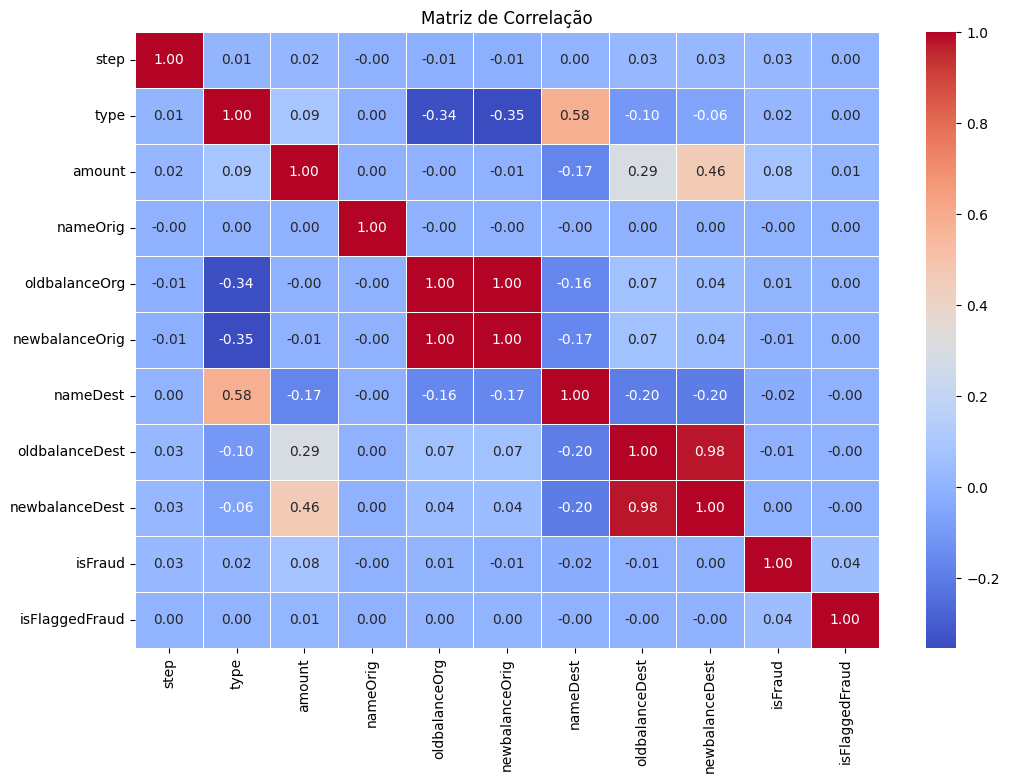

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular a matriz de correlação
matriz_correlacao = dados.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Remover as colunas 'isFlaggedFraud', 'nameOrig' e 'nameDest'
dados = dados.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest', 'newbalanceOrig', 'newbalanceDest'])

list(dados.columns)

['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']

Critério de remoção das colunas:
*   nameDest - Pois são dados sensíveis e irrelevantes para a análise. O identificador do destinatário da transação. Como o nameOrig, é um código ou número de conta que representa o cliente ou entidade que recebe o dinheiro.

*   NameOring - Pois são dados sensíveis e irrelevantes para a análise. O identificador do cliente que iniciou a transação. Normalmente, é um código ou número de conta que representa o cliente.

*   isFlaggedFraud - Praticamente essa feature diz para o modelo qual é o nosso alvo.
  


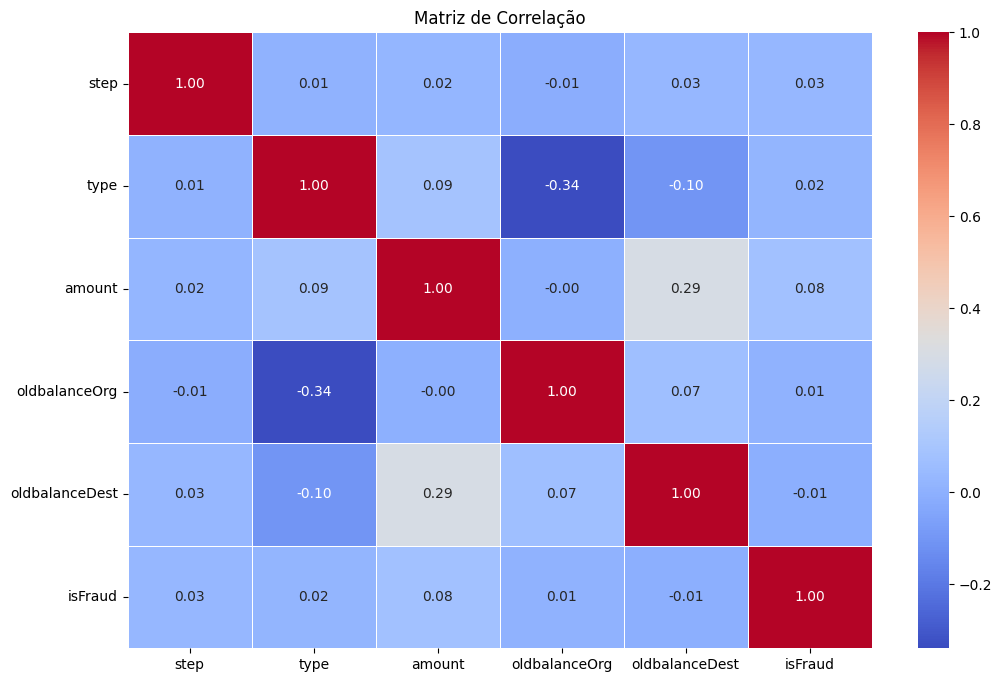

In [ ]:
# Calcular a matriz de correlação
matriz_correlacao = dados.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
linhas_duplicadas = dados.duplicated()
total_linhas_duplicadas = linhas_duplicadas.sum()

print("Número total de linhas duplicadas:", total_linhas_duplicadas)

dados_faltantes_por_coluna = dados.isnull().sum()

print("Dados faltantes por coluna:")
print(dados_faltantes_por_coluna)

total_dados_faltantes = dados.isnull().sum().sum()
print("Total de dados faltantes em toda a base:", total_dados_faltantes)

Número total de linhas duplicadas: 878
Dados faltantes por coluna:
step              0
type              0
amount            0
oldbalanceOrg     0
oldbalanceDest    0
isFraud           0
dtype: int64
Total de dados faltantes em toda a base: 0


In [ ]:
#Deletando dados duplicados
dados = dados.drop_duplicates()

linhas_duplicadas = dados.duplicated()
total_linhas_duplicadas = linhas_duplicadas.sum()

print("Número total de linhas duplicadas:", total_linhas_duplicadas)

Número total de linhas duplicadas: 0


In [ ]:
#separação da feature alvo das demais da base
X = dados.drop('isFraud', axis=1)
y = dados['isFraud']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Normalização dos dados

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

X[:] = scaler.fit_transform(X)

print("Dados originais:")
print(dados)
print("\nDados normalizados:")
print(X)

Dados originais:
         step  type      amount  oldbalanceOrg  oldbalanceDest  isFraud
0           1     3     9839.64      170136.00            0.00        0
1           1     3     1864.28       21249.00            0.00        0
2           1     4      181.00         181.00            0.00        1
3           1     1      181.00         181.00        21182.00        1
4           1     3    11668.14       41554.00            0.00        0
...       ...   ...         ...            ...             ...      ...
6362615   743     1   339682.13      339682.13            0.00        1
6362616   743     4  6311409.28     6311409.28            0.00        1
6362617   743     1  6311409.28     6311409.28        68488.84        1
6362618   743     4   850002.52      850002.52            0.00        1
6362619   743     1   850002.52      850002.52      6510099.11        1

[6361742 rows x 6 columns]

Dados normalizados:
         step  type    amount  oldbalanceOrg  oldbalanceDest
0        

# Separação dos conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train e y_train são os dados de treinamento
# X_test e y_test são os dados de teste

# Printando os tamanhos dos conjuntos
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 5089393
Tamanho do conjunto de teste: 1272349


# Balanceamento

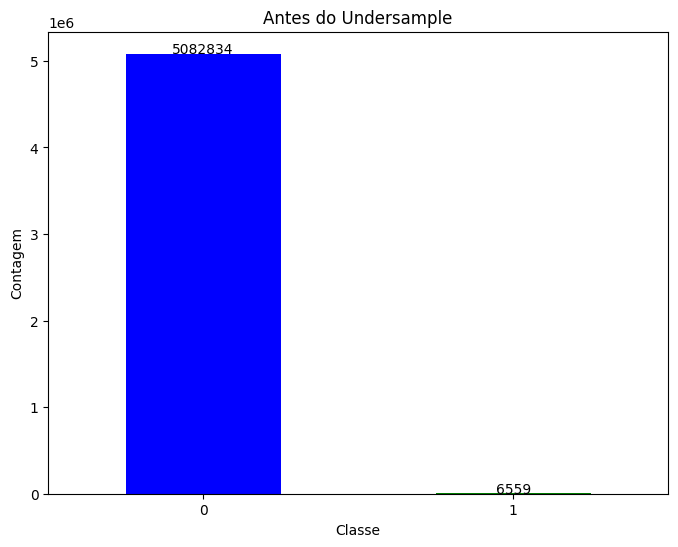

In [ ]:
# Contagem das classes na base de treino (y_train)
class_counts = y_train.value_counts()

# Definindo cores diferentes para as barras
colors = ['blue', 'green']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=colors)
plt.title('Antes do Undersample')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar os valores de cada barra no gráfico
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), ha='center')

plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Contagem das classes antes da subamostragem
print("Contagem de classes antes da subamostragem:")
print(y_train.value_counts())

# Definindo a quantidade desejada para cada classe
desired_count = 6559
sampling_strategy = {0: desired_count, 1: y_train.value_counts()[1]}

# Aplicar o RandomUnderSampler com balanceamento para o valor desejado
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=32)
X_train, y_train = undersample.fit_resample(X_train, y_train)

# Contagem das classes após a subamostragem
print("Contagem de classes após a subamostragem:")
print(y_train.value_counts())

Contagem de classes antes da subamostragem:
isFraud
0    5082834
1       6559
Name: count, dtype: int64
Contagem de classes após a subamostragem:
isFraud
0    6559
1    6559
Name: count, dtype: int64


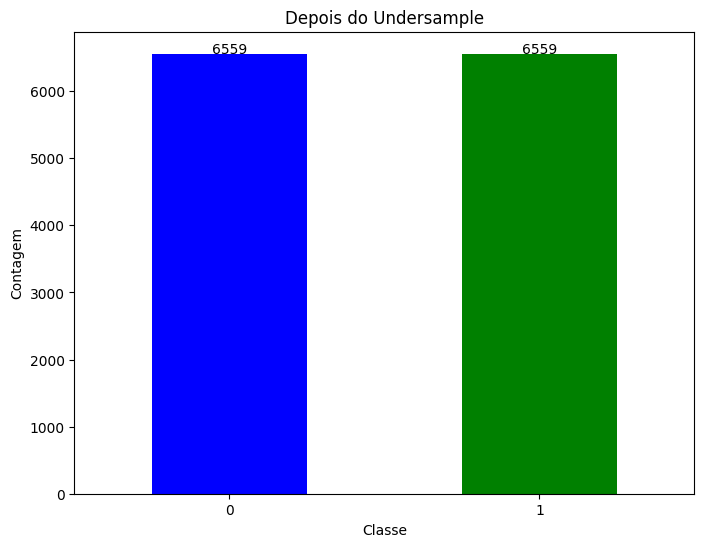

In [ ]:
# Contagem das classes na base de treino (y_train)
class_counts = y_train.value_counts()

# Definindo cores diferentes para as barras
colors = ['blue', 'green']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=colors)
plt.title('Depois do Undersample')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar os valores de cada barra no gráfico
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), ha='center')

plt.show()

#Aplicando nos modelos:

#DecisionTree

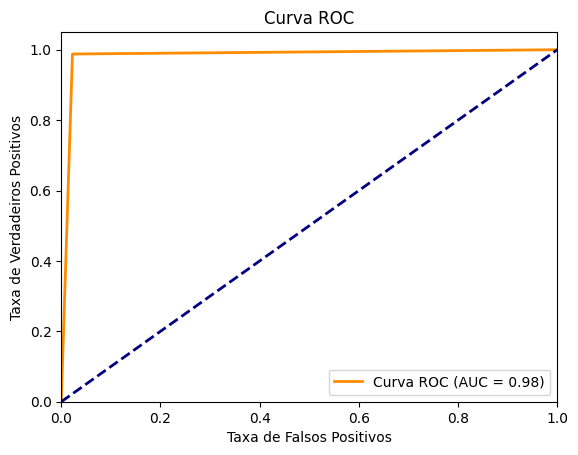


--------------------------------------------------------------------------

Acurácia do modelo Decision Tree: 0.9774700180532229
Especificidade: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270711
           1       0.05      0.99      0.10      1638

    accuracy                           0.98   1272349
   macro avg       0.53      0.98      0.55   1272349
weighted avg       1.00      0.98      0.99   1272349



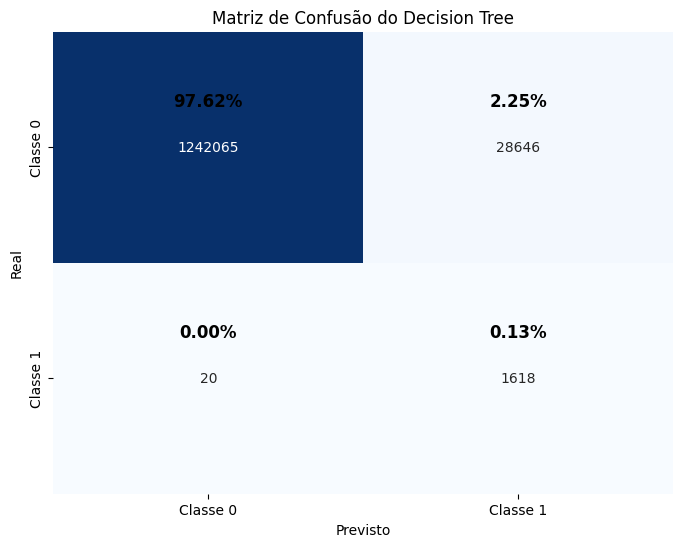

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o classificador Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Inicializando o classificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=0)

# Treinando o modelo Decision Tree
dt_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_dt = dt_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Acurácia do modelo Decision Tree:", accuracy_dt)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_dt)

# Gerando o classification report
report_dt = classification_report(y_test, y_pred_dt)
print('Classification Report:\n', report_dt)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_dt)
for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_dt[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do Decision Tree")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#RandomForet

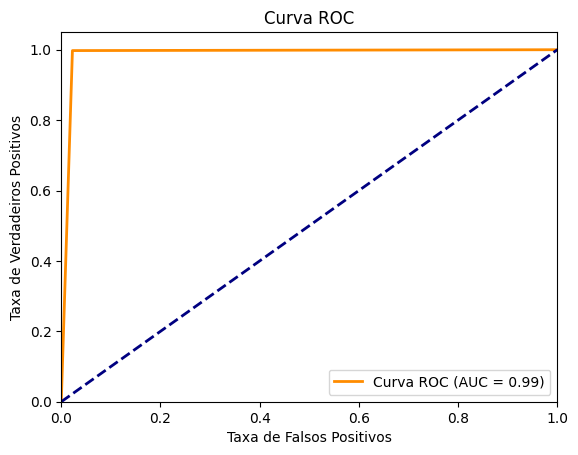


--------------------------------------------------------------------------

Acurácia do modelo Random Forest: 0.9775376095709589
Especificidade: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270711
           1       0.05      1.00      0.10      1638

    accuracy                           0.98   1272349
   macro avg       0.53      0.99      0.55   1272349
weighted avg       1.00      0.98      0.99   1272349



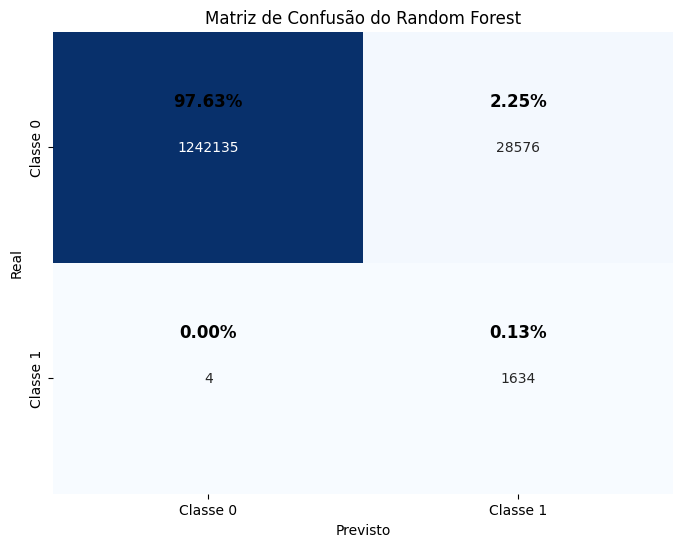

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializando o classificador Random Forest
rf_classifier = RandomForestClassifier(random_state=0)

# Treinando o modelo Random Forest
rf_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia do modelo Random Forest:", accuracy_rf)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_rf)

# Gerando o classification report
report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report:\n', report_rf)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_rf)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_rf[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#ExtraTrees

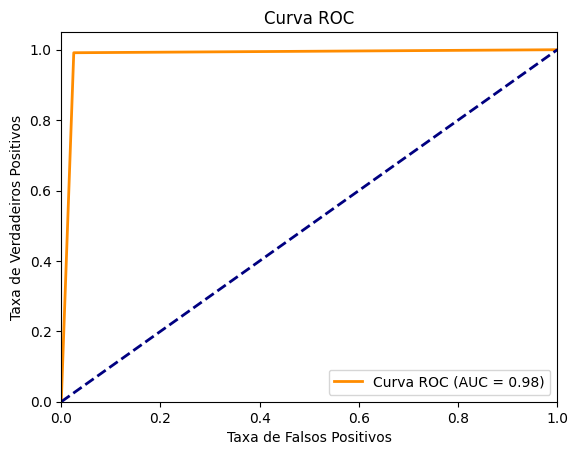


--------------------------------------------------------------------------

Acurácia do modelo Extra Trees: 0.9748528116106508
Especificidade: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   1270711
           1       0.05      0.99      0.09      1638

    accuracy                           0.97   1272349
   macro avg       0.52      0.98      0.54   1272349
weighted avg       1.00      0.97      0.99   1272349



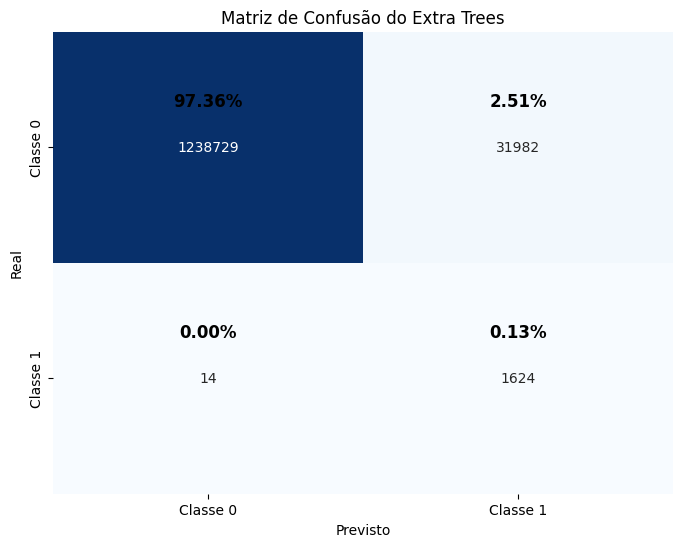

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando o classificador Extra Trees
et_classifier = ExtraTreesClassifier(random_state=0)

# Treinando o modelo Extra Trees
et_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_et = et_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_et)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo Extra Trees
accuracy_et = accuracy_score(y_test, y_pred_et)
print("Acurácia do modelo Extra Trees:", accuracy_et)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo Extra Trees
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_et)

# Gerando o classification report
report_et = classification_report(y_test, y_pred_et)
print('Classification Report:\n', report_et)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_et)
for i in range(conf_matrix_et.shape[0]):
    for j in range(conf_matrix_et.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_et[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do Extra Trees")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#PassiveAggressive

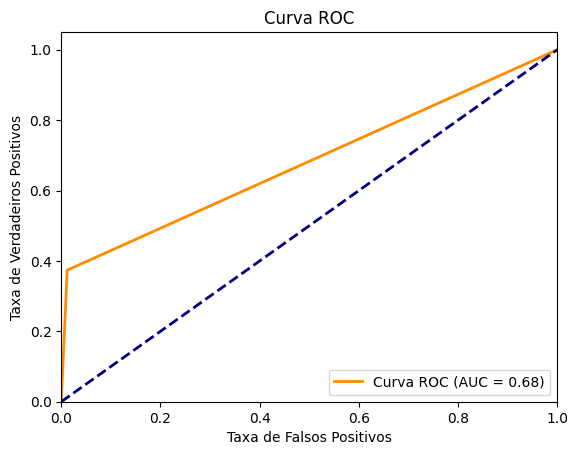


--------------------------------------------------------------------------

Acurácia do modelo Passive Aggressive: 0.9872920087177339
Especificidade: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270711
           1       0.04      0.37      0.07      1638

    accuracy                           0.99   1272349
   macro avg       0.52      0.68      0.53   1272349
weighted avg       1.00      0.99      0.99   1272349



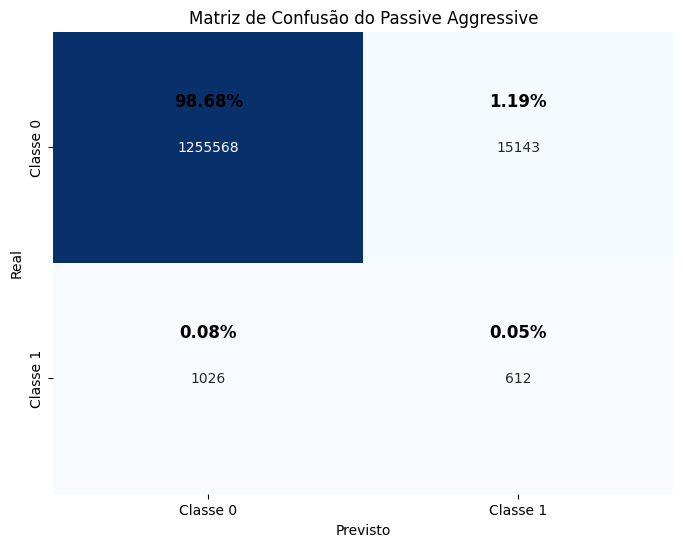

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando o classificador Passive Aggressive
pa_classifier = PassiveAggressiveClassifier(random_state=0)

# Treinando o modelo Passive Aggressive
pa_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_pa = pa_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pa)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo Passive Aggressive
accuracy_pa = accuracy_score(y_test, y_pred_pa)
print("Acurácia do modelo Passive Aggressive:", accuracy_pa)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo Passive Aggressive
conf_matrix_pa = confusion_matrix(y_test, y_pred_pa)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_pa)

# Gerando o classification report
report_pa = classification_report(y_test, y_pred_pa)
print('Classification Report:\n', report_pa)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pa, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_pa)
for i in range(conf_matrix_pa.shape[0]):
    for j in range(conf_matrix_pa.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_pa[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do Passive Aggressive")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#XGBoost

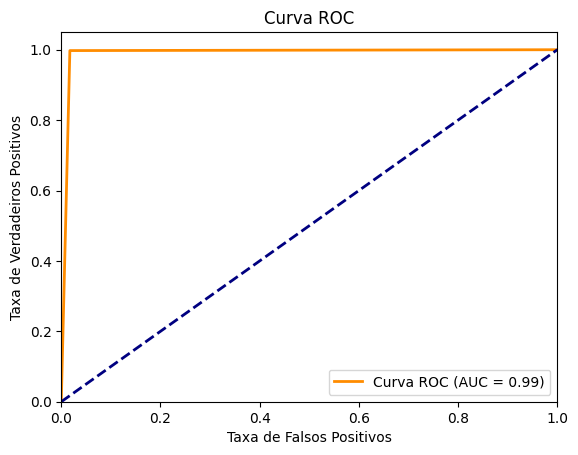


--------------------------------------------------------------------------

Acurácia do modelo XGBoost: 0.9827075747298893
Especificidade: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270711
           1       0.07      1.00      0.13      1638

    accuracy                           0.98   1272349
   macro avg       0.53      0.99      0.56   1272349
weighted avg       1.00      0.98      0.99   1272349



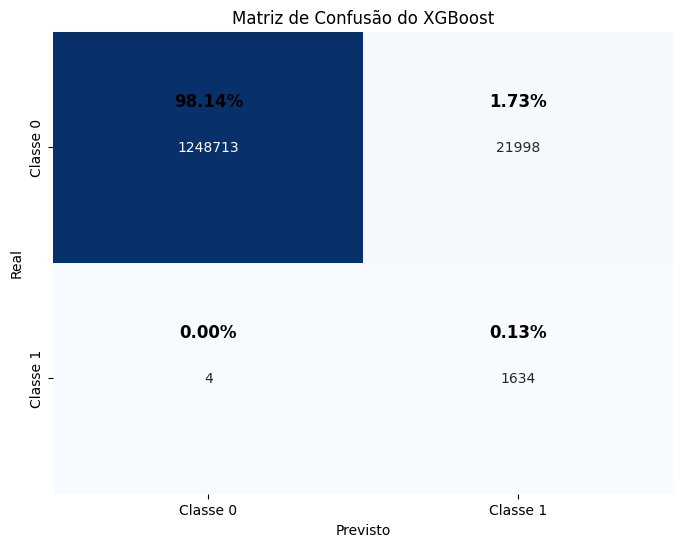

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando o classificador XGBoost
xgb_classifier = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Treinando o modelo XGBoost
xgb_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Acurácia do modelo XGBoost:", accuracy_xgb)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_xgb)

# Gerando o classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report:\n', report_xgb)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_xgb)
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_xgb[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do XGBoost")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#SVM

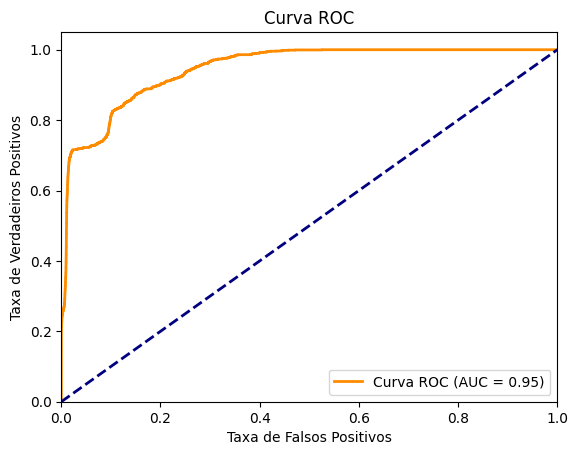


--------------------------------------------------------------------------

Acurácia do modelo SVM: 0.9001736158868361
Especificidade: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270711
           1       0.01      0.81      0.02      1638

    accuracy                           0.90   1272349
   macro avg       0.51      0.85      0.48   1272349
weighted avg       1.00      0.90      0.95   1272349



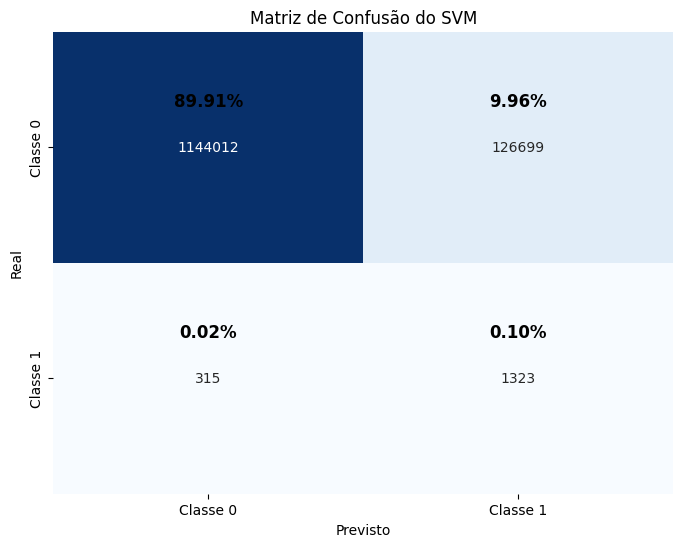

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando o classificador SVM
svm_classifier = SVC(random_state=0, probability=True)

# Treinando o modelo SVM
svm_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_svm = svm_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Acurácia do modelo SVM:", accuracy_svm)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_svm)

# Gerando o classification report
report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report:\n', report_svm)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_svm)
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_svm[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#KNN

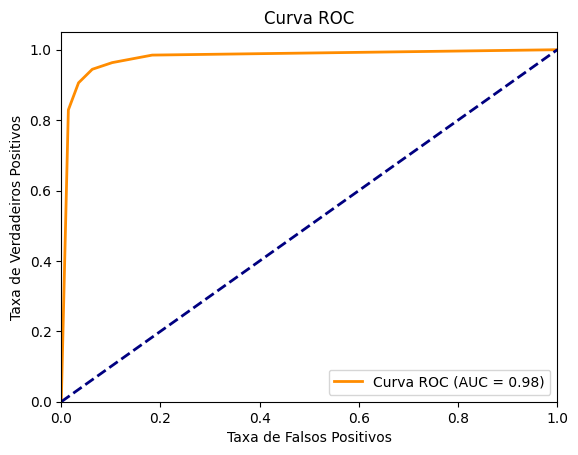


--------------------------------------------------------------------------

Acurácia do modelo KNN: 0.937502996426295
Especificidade: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270711
           1       0.02      0.94      0.04      1638

    accuracy                           0.94   1272349
   macro avg       0.51      0.94      0.50   1272349
weighted avg       1.00      0.94      0.97   1272349



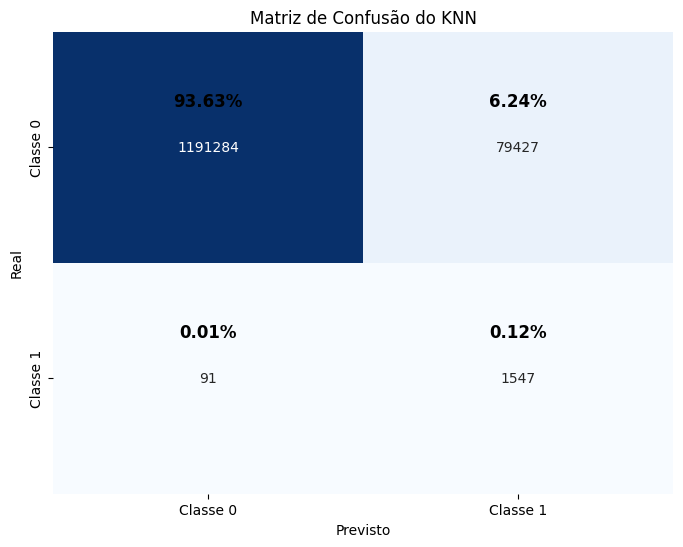

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando o classificador KNN
knn_classifier = KNeighborsClassifier()

# Treinando o modelo KNN
knn_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_knn = knn_classifier.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("")
print("--------------------------------------------------------------------------")
print("")

# Calculando a acurácia do modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do modelo KNN:", accuracy_knn)

# Função para calcular e printar a especificidade
def calcular_especificidade(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print(f'Especificidade: {specificity:.2f}')

# Calculando a matriz de confusão para o modelo KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculando e printando a especificidade
calcular_especificidade(conf_matrix_knn)

# Gerando o classification report
report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report:\n', report_knn)

# Plotando a matriz de confusão com porcentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
total = np.sum(conf_matrix_knn)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_knn[i, j] / total * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Matriz de Confusão do KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

#Aplicando o Ensemble heterogêneo com todos os modelos

Acurácia do Ensemble heterogêneo: 0.9855079070286533
Classification Report - Ensemble heterogêneo:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270711
           1       0.08      0.99      0.15      1638

    accuracy                           0.99   1272349
   macro avg       0.54      0.99      0.57   1272349
weighted avg       1.00      0.99      0.99   1272349



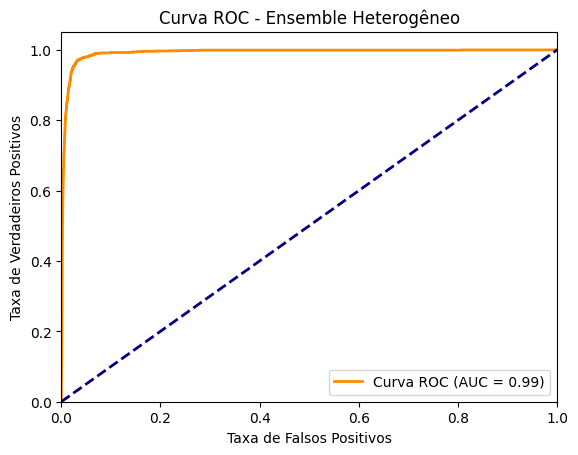

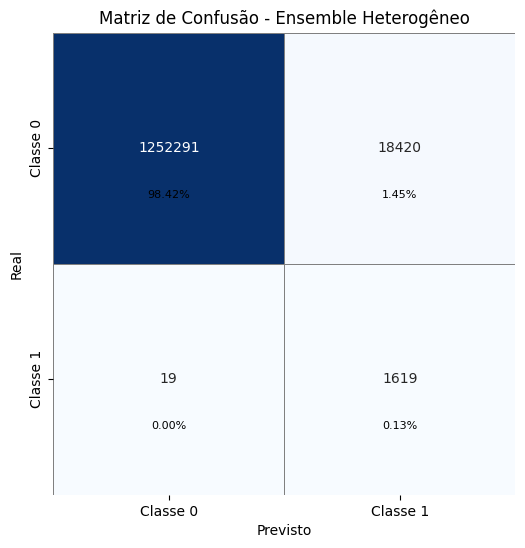

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo os classificadores que serão usados no ensemble
classifiers = {
    "Random Forest": rf_classifier,
    "Extra Trees": et_classifier,
    "Passive Aggressive": pa_classifier,
    "XGBoost": xgb_classifier,
    "SVM": svm_classifier,
    "Decision Tree": dt_classifier,
    "KNN": knn_classifier
}

# Criando e treinando um Ensemble heterogêneo com votação 'hard'
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', classifiers["Random Forest"]),
        ('et', classifiers["Extra Trees"]),
        ('pa', classifiers["Passive Aggressive"]),
        ('xgb', classifiers["XGBoost"]),
        ('svm', classifiers["SVM"]),
        ('dt', classifiers["Decision Tree"]),
        ('knn', classifiers["KNN"])
    ],
    voting='hard'
)
ensemble_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste usando o ensemble
y_pred_ensemble = ensemble_classifier.predict(X_test)

# Calculando a acurácia do ensemble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Acurácia do Ensemble heterogêneo:", accuracy_ensemble)

# Gerando o classification report para o ensemble
report_ensemble = classification_report(y_test, y_pred_ensemble)
print('Classification Report - Ensemble heterogêneo:\n', report_ensemble)

# Calculando a curva ROC para o ensemble
y_pred_prob_ensemble = np.mean([clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test) for _, clf in ensemble_classifier.estimators], axis=0)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_prob_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plotando a curva ROC para o ensemble
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Ensemble Heterogêneo')
plt.legend(loc='lower right')
plt.show()

# Calculando a matriz de confusão para o ensemble
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Plotando a matriz de confusão para o ensemble
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt="d", cmap="Blues", cbar=False,
            linewidths=0.5, linecolor='gray', square=True,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Adicionando as porcentagens abaixo dos valores
for i in range(conf_matrix_ensemble.shape[0]):
    for j in range(conf_matrix_ensemble.shape[1]):
        plt.text(j+0.5, i+0.7, "{:.2f}%".format(conf_matrix_ensemble[i, j] / np.sum(conf_matrix_ensemble) * 100),
                 ha='center', va='center', color='black', fontsize=8)

plt.title("Matriz de Confusão - Ensemble Heterogêneo")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

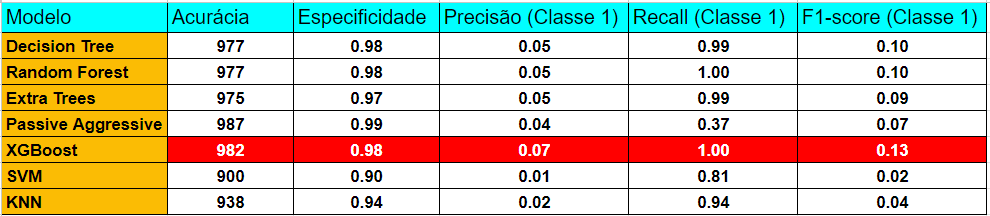

# A partir da análise acima o modelo escolhido foi o XGBoost, devido ao seu alto F1-score (0.13) e recall (1.00) para a classe minoritária, o que indica um bom equilíbrio entre precisão e recall, servindo bem para detectar corretamente casos positivos sem muitos falsos positivos.